In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define binary patterns for letters
A = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [0,0,0,0,0]
])

B = np.array([
    [1,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,0],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,1,1,1,0],
    [0,0,0,0,0]
])

C = np.array([
    [0,1,1,1,1],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [0,1,1,1,1],
    [0,0,0,0,0]
])

# Flatten into vectors (35 features each: 7x5)
X = np.array([A.flatten(), B.flatten(), C.flatten()])

# One-hot encoded labels
y = np.array([
    [1,0,0],  # A
    [0,1,0],  # B
    [0,0,1]   # C
])


In [2]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)   # assumes input is sigmoid(x) already


In [3]:
np.random.seed(42)

input_size = X.shape[1]   # 35
hidden_size = 10
output_size = 3

W1 = np.random.uniform(-1, 1, (input_size, hidden_size))
b1 = np.zeros((1, hidden_size))

W2 = np.random.uniform(-1, 1, (hidden_size, output_size))
b2 = np.zeros((1, output_size))


In [4]:
learning_rate = 0.5
epochs = 2000

losses = []
accuracies = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute loss (MSE)
    loss = np.mean((y - a2) ** 2)
    losses.append(loss)

    # Accuracy
    preds = np.argmax(a2, axis=1)
    true = np.argmax(y, axis=1)
    accuracy = np.mean(preds == true)
    accuracies.append(accuracy)

    # Backpropagation
    error_output = y - a2
    d_output = error_output * sigmoid_derivative(a2)

    error_hidden = np.dot(d_output, W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    # Update weights & biases
    W2 += np.dot(a1.T, d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    W1 += np.dot(X.T, d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Print progress every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f} | Acc: {accuracy:.2f}")


Epoch 0 | Loss: 0.3699 | Acc: 0.33
Epoch 500 | Loss: 0.0012 | Acc: 1.00
Epoch 1000 | Loss: 0.0005 | Acc: 1.00
Epoch 1500 | Loss: 0.0003 | Acc: 1.00


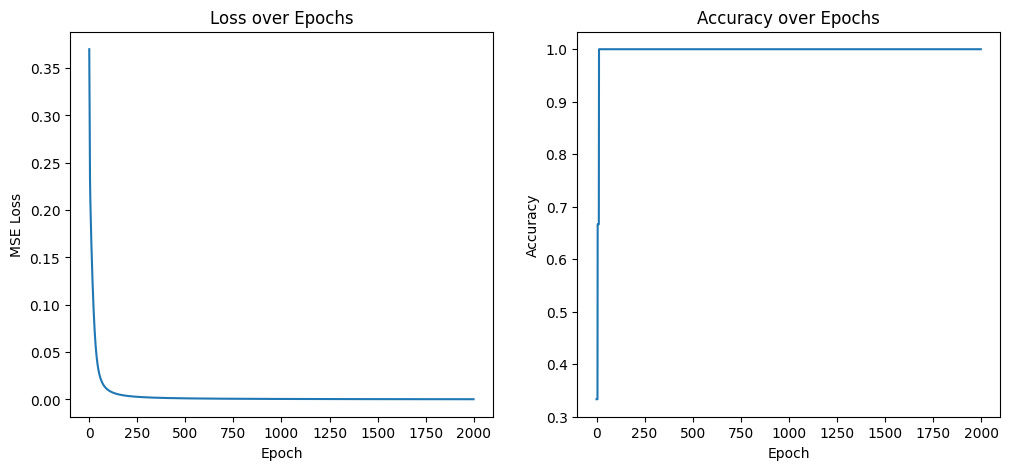

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

plt.subplot(1,2,2)
plt.plot(accuracies)
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


Predicted: C | Probabilities: [[0.01064129 0.01258824 0.98331496]]


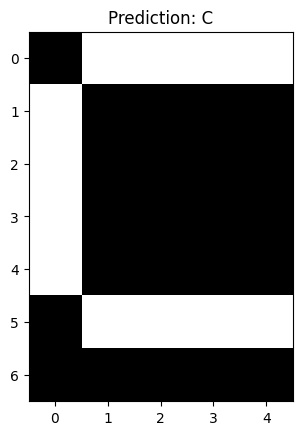

In [6]:
def predict(letter_matrix):
    x = letter_matrix.flatten().reshape(1, -1)
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    pred = np.argmax(a2)
    return pred, a2

# Test with letter C
test_letter = C
pred_idx, probs = predict(test_letter)

labels = ["A", "B", "C"]
print(f"Predicted: {labels[pred_idx]} | Probabilities: {probs}")

plt.imshow(test_letter, cmap="gray")
plt.title(f"Prediction: {labels[pred_idx]}")
plt.show()
